# Project 2

## Process
* create a small data set (only 12 elements) to look at text processing and see how BoW vectorization works
* create vectors for the data
    * default
    * exclude common words
    * exclude rare words
    * count # of times word is used in single review? or just present at all
    * look at word pairs? word triples? expensive to generate, could produce better results
* train a simple logistic regression on the data
    * look at all different vectors, see which set is best
* tweak logistic hyperparams
* train MLP
* train decision tree

In [1]:
# imports

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import minmax_scale

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier


## Data processing
* Removing whitespace and punctuation
* Converting to all lowercase
* Generating vectors

### Default BoW

In [2]:
# big
raw_reviews = pd.read_csv('data/data_reviews/x_train.csv')['text'].values.tolist()
reviews = list()

pattern = re.compile('[^a-z ]')
for review in raw_reviews:
    review = review.lower()
    review = pattern.sub('', review)
    reviews.append(review)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(reviews)
y = pd.read_csv('data/data_reviews/y_train.csv').to_numpy().ravel()

In [65]:
# # small
# raw_reviews_short = pd.read_csv('data/data_reviews/x_train_small.csv')['text'].values.tolist()
# reviews_short = list()

# pattern = re.compile('[^a-z ]')
# for review_short in raw_reviews_short:
#     review_short = review_short.lower()
#     review_short = pattern.sub('', review_short)
#     reviews_short.append(review_short)

# vectorizer_short = CountVectorizer()
# X_short = vectorizer_short.fit_transform(reviews_short)
# y_short = pd.read_csv('data/data_reviews/y_train_small.csv').to_numpy().ravel()
# # vectorizer_short.get_feature_names()

### BOW w 

## Logistic regression

### Default

In [66]:
# kf = KFold()
# log_model = linear_model.LogisticRegression()

# k_train_losses = list()
# k_train_scores = list()
# k_train_aucs = list()

# k_val_losses = list()
# k_val_scores = list()
# k_val_aucs = list()

# for train_index, val_index in kf.split(X):
#     x_train, x_val = X[train_index], X[val_index]
#     y_train, y_val = y[train_index], y[val_index]
#     log_model.fit(x_train, y_train)
    
#     train_probas = minmax_scale(log_model.decision_function(x_train).reshape(-1,1))
#     val_probas = minmax_scale(log_model.decision_function(x_val).reshape(-1, 1))
#     # for i in train_probas:
#     #     print(i, end=' ') 
#     # print()
#     k_train_losses.append(log_loss(y_train, train_probas))
#     k_train_scores.append(log_model.score(x_train, y_train))
#     k_train_aucs.append(roc_auc_score(y_train, train_probas))
    
#     k_val_losses.append(log_loss(y_val, val_probas))
#     k_val_scores.append(log_model.score(x_val, y_val))
#     k_val_aucs.append(roc_auc_score(y_val, val_probas))
    
#     print('   TRAIN -- auc: {:5f}   loss: {:5f}   score: {:5f}'.format(
#         k_train_aucs[-1],
#         k_train_losses[-1],
#         k_train_scores[-1]))

#     print('   TEST --  auc: {:5f}   loss: {:5f}   score: {:5f}'.format(
#         k_val_aucs[-1],
#         k_val_losses[-1],
#         k_val_scores[-1]))

# print('TRAIN -- auc: {:5f}   loss: {:5f}   score: {:5f}'.format(
#     np.mean(k_train_aucs),
#     np.mean(k_train_losses),
#     np.mean(k_train_scores)))

# print('TEST --  auc: {:5f}   loss: {:5f}   score: {:5f}'.format(
#     np.mean(k_val_aucs),
#     np.mean(k_val_losses),
#     np.mean(k_val_scores)))

### Max iters

In [67]:
# # find max_iter
# train_losses = list()
# train_scores = list()
# val_scores = list()
# val_losses = list()

# for i in np.logspace(0, 2, 20):
#     kf = KFold()
#     log_model = linear_model.LogisticRegression(max_iter=i)

#     k_train_losses = list()
#     k_train_scores = list()
#     k_val_losses   = list()
#     k_val_scores   = list()

#     for train_index, val_index in kf.split(X):
#         x_train, x_val = X[train_index], X[val_index]
#         y_train, y_val = y[train_index], y[val_index]
#         log_model.fit(x_train, y_train)
#         k_train_losses.append(logloss(x_train, y_train, log_model))
#         k_train_scores.append(score(x_train, y_train, log_model))
#         k_val_losses .append(logloss(x_val, y_val, log_model))
#         k_val_scores .append(score(x_val, y_val, log_model))

#     train_losses.append(np.mean(k_train_losses))
#     train_scores.append(np.mean(k_train_scores))
#     val_losses.append(np.mean(k_val_losses))
#     val_scores.append(np.mean(k_val_scores))

# # plot accuracy
# plt.title('Model Accuracy vs Maximum Iterations')
# plt.xlabel('maximum iterations')
# plt.ylabel('accuracy')
# plt.scatter(np.logspace(0, 2, 20), val_scores)
# plt.show()

# # plot error
# plt.title('Logistic Loss vs Maximum Iterations')
# plt.xlabel('maximum iterations')
# plt.ylabel('logistic loss')
# plt.scatter(np.logspace(0, 2, 20), val_losses, c='r')
# plt.show()

### LBFGS L2
best C: 8.68511373751352

In [68]:
# # find best C
# train_scores = list()
# train_aucs = list()
# train_losses = list()

# val_scores = list()
# val_aucs = list()
# val_losses = list()

# best_c = 10**-2
# best_loss = 1000

# kf = KFold(shuffle=True)
# for c in np.logspace(-2, 2, 50):
#     log_model = linear_model.LogisticRegression(solver='lbfgs', penalty='l2', max_iter=500, C=c)
    
#     k_train_scores = list()
#     k_train_aucs = list()
#     k_train_losses = list()
    
#     k_val_scores = list()
#     k_val_aucs = list()
#     k_val_losses = list()
    
#     for train_index, val_index in kf.split(X):
#         x_train, x_val = X[train_index], X[val_index]
#         y_train, y_val = y[train_index], y[val_index]
#         log_model.fit(x_train, y_train)
        
#         train_probas = minmax_scale(log_model.decision_function(x_train))
#         val_probas = minmax_scale(log_model.decision_function(x_val))
                
#         k_train_scores.append(log_model.score(x_train, y_train))
#         k_train_aucs.append(roc_auc_score(y_train, train_probas))
#         k_train_losses.append(log_loss(y_train, train_probas))

#         k_val_scores.append(log_model.score(x_val, y_val))
#         k_val_aucs.append(roc_auc_score(y_val, val_probas))
#         k_val_losses.append(log_loss(y_val, val_probas))

#     if np.mean(k_val_losses) < best_loss:
#         best_c = c
#         best_loss = np.mean(k_val_losses)

#     train_scores.append(np.mean(k_train_scores))
#     train_aucs.append(np.mean(k_train_aucs))
#     train_losses.append(np.mean(k_train_losses))

#     val_scores.append(np.mean(k_val_scores))
#     val_aucs.append(np.mean(k_val_aucs))
#     val_losses.append(np.mean(k_val_losses))

#     print('C: {:2f}   score: {:5f}   auc: {:5f}   loss: {:5f}'.format(
#         c,
#         np.mean(k_val_scores), 
#         np.mean(k_val_aucs),
#         np.mean(k_val_losses)))

# print('best C:', best_c)

In [69]:
# # plots

# # plot accuracy
# plt.title('Model Accuracy vs Inverse of Regularization Penalty')
# plt.xlabel('inverse of regularization penalty, C')
# plt.ylabel('accuracy')
# plt.scatter(np.logspace(-2, 2, 50), val_scores, label='validation')
# plt.scatter(np.logspace(-2, 2, 50), train_scores, c='r', label='train')
# plt.xscale('log')
# plt.legend()
# plt.show()

# # plot loss
# plt.title('Logistic Loss vs Inverse of Regularization Penalty')
# plt.xlabel('inverse of regularization penalty, C')
# plt.ylabel('logistic loss')
# plt.scatter(np.logspace(-2, 2, 50), val_losses, label='validation')
# plt.scatter(np.logspace(-2, 2, 50), train_losses, c='r', label='train')
# plt.xscale('log')
# plt.legend()
# plt.show()

# # plot auc
# plt.title('AUC of ROC Curve vs Inverse of Regularization Penalty')
# plt.xlabel('inverse of regularization penalty, C')
# plt.ylabel('auc')
# plt.scatter(np.logspace(-2, 2, 50), val_aucs, label='validation')
# plt.scatter(np.logspace(-2, 2, 50), train_aucs, c='r', label='train')
# plt.xscale('log')
# plt.legend()
# plt.show()

In [70]:
# # best model details

# kf = KFold()
# log_model = linear_model.LogisticRegression(solver='lbfgs', penalty='l2', max_iter=500, C=c)

# k_train_scores = list()
# k_train_aucs = list()
# k_train_losses = list()

# k_val_scores = list()
# k_val_aucs = list()
# k_val_losses = list()

# for train_index, val_index in kf.split(X):
#     x_train, x_val = X[train_index], X[val_index]
#     y_train, y_val = y[train_index], y[val_index]
#     log_model.fit(x_train, y_train)

#     train_probas = minmax_scale(log_model.decision_function(x_train))
#     val_probas = minmax_scale(log_model.decision_function(x_val))
            
#     k_train_scores.append(log_model.score(x_train, y_train))
#     k_train_aucs.append(roc_auc_score(y_train, train_probas))
#     k_train_losses.append(log_loss(y_train, train_probas))

#     k_val_scores.append(log_model.score(x_val, y_val))
#     k_val_aucs.append(roc_auc_score(y_val, val_probas))
#     k_val_losses.append(log_loss(y_val, val_probas))

# print('TRAIN -- score: {:5f}   auc: {:5f}   loss: {:5f}'.format(
#         np.mean(k_train_scores), 
#         np.mean(k_train_aucs),
#         np.mean(k_train_losses)))

# print('VALID -- score: {:5f}   auc: {:5f}   loss: {:5f}'.format(
#         np.mean(k_val_scores), 
#         np.mean(k_val_aucs),
#         np.mean(k_val_losses)))

### LBFGS none

In [71]:
# # details

# kf = KFold()
# log_model = linear_model.LogisticRegression(solver='lbfgs', penalty='none', max_iter=500)

# k_train_scores = list()
# k_train_aucs = list()
# k_train_losses = list()

# k_val_scores = list()
# k_val_aucs = list()
# k_val_losses = list()

# for train_index, val_index in kf.split(X):
#     x_train, x_val = X[train_index], X[val_index]
#     y_train, y_val = y[train_index], y[val_index]
#     log_model.fit(x_train, y_train)

#     train_probas = minmax_scale(log_model.decision_function(x_train))
#     val_probas = minmax_scale(log_model.decision_function(x_val))
            
#     k_train_scores.append(log_model.score(x_train, y_train))
#     k_train_aucs.append(roc_auc_score(y_train, train_probas))
#     k_train_losses.append(log_loss(y_train, train_probas))

#     k_val_scores.append(log_model.score(x_val, y_val))
#     k_val_aucs.append(roc_auc_score(y_val, val_probas))
#     k_val_losses.append(log_loss(y_val, val_probas))

# print('TRAIN -- score: {:5f}   auc: {:5f}   loss: {:5f}'.format(
#         np.mean(k_train_scores), 
#         np.mean(k_train_aucs),
#         np.mean(k_train_losses)))

# print('VALID -- score: {:5f}   auc: {:5f}   loss: {:5f}'.format(
#         np.mean(k_val_scores), 
#         np.mean(k_val_aucs),
#         np.mean(k_val_losses)))

### liblinear L2
best C: 

In [72]:
# # find best C
# train_scores = list()
# train_aucs = list()
# train_losses = list()

# val_scores = list()
# val_aucs = list()
# val_losses = list()

# best_c = 10**-2
# best_loss = 1000

# kf = KFold(shuffle=True)
# for c in np.logspace(-2, 2, 50):
#     log_model = linear_model.LogisticRegression(solver='liblinear', penalty='l2', max_iter=500, C=c)
    
#     k_train_scores = list()
#     k_train_aucs = list()
#     k_train_losses = list()
    
#     k_val_scores = list()
#     k_val_aucs = list()
#     k_val_losses = list()
    
#     for train_index, val_index in kf.split(X):
#         x_train, x_val = X[train_index], X[val_index]
#         y_train, y_val = y[train_index], y[val_index]
#         log_model.fit(x_train, y_train)
        
#         train_probas = minmax_scale(log_model.decision_function(x_train))
#         val_probas = minmax_scale(log_model.decision_function(x_val))
                
#         k_train_scores.append(log_model.score(x_train, y_train))
#         k_train_aucs.append(roc_auc_score(y_train, train_probas))
#         k_train_losses.append(log_loss(y_train, train_probas))

#         k_val_scores.append(log_model.score(x_val, y_val))
#         k_val_aucs.append(roc_auc_score(y_val, val_probas))
#         k_val_losses.append(log_loss(y_val, val_probas))

#     if np.mean(k_val_losses) < best_loss:
#         best_c = c
#         best_loss = np.mean(k_val_losses)

#     train_scores.append(np.mean(k_train_scores))
#     train_aucs.append(np.mean(k_train_aucs))
#     train_losses.append(np.mean(k_train_losses))

#     val_scores.append(np.mean(k_val_scores))
#     val_aucs.append(np.mean(k_val_aucs))
#     val_losses.append(np.mean(k_val_losses))

#     print('C: {:2f}   score: {:5f}   auc: {:5f}   loss: {:5f}'.format(
#         c,
#         np.mean(k_val_scores), 
#         np.mean(k_val_aucs),
#         np.mean(k_val_losses)))

# print('best C:', best_c)

In [73]:
# # plots

# # plot accuracy
# plt.title('Model Accuracy vs Inverse of Regularization Penalty')
# plt.xlabel('inverse of regularization penalty, C')
# plt.ylabel('accuracy')
# plt.scatter(np.logspace(-2, 2, 50), val_scores, label='validation')
# plt.scatter(np.logspace(-2, 2, 50), train_scores, c='r', label='train')
# plt.xscale('log')
# plt.legend()
# plt.show()

# # plot loss
# plt.title('Logistic Loss vs Inverse of Regularization Penalty')
# plt.xlabel('inverse of regularization penalty, C')
# plt.ylabel('logistic loss')
# plt.scatter(np.logspace(-2, 2, 50), val_losses, label='validation')
# plt.scatter(np.logspace(-2, 2, 50), train_losses, c='r', label='train')
# plt.xscale('log')
# plt.legend()
# plt.show()

# # plot auc
# plt.title('AUC of ROC Curve vs Inverse of Regularization Penalty')
# plt.xlabel('inverse of regularization penalty, C')
# plt.ylabel('auc')
# plt.scatter(np.logspace(-2, 2, 50), val_aucs, label='validation')
# plt.scatter(np.logspace(-2, 2, 50), train_aucs, c='r', label='train')
# plt.xscale('log')
# plt.legend()
# plt.show()

In [74]:
# # best model details

# kf = KFold()
# log_model = linear_model.LogisticRegression(solver='liblinear', penalty='l2', max_iter=500, C=c)

# k_train_scores = list()
# k_train_aucs = list()
# k_train_losses = list()

# k_val_scores = list()
# k_val_aucs = list()
# k_val_losses = list()

# for train_index, val_index in kf.split(X):
#     x_train, x_val = X[train_index], X[val_index]
#     y_train, y_val = y[train_index], y[val_index]
#     log_model.fit(x_train, y_train)

#     train_probas = minmax_scale(log_model.decision_function(x_train))
#     val_probas = minmax_scale(log_model.decision_function(x_val))
            
#     k_train_scores.append(log_model.score(x_train, y_train))
#     k_train_aucs.append(roc_auc_score(y_train, train_probas))
#     k_train_losses.append(log_loss(y_train, train_probas))

#     k_val_scores.append(log_model.score(x_val, y_val))
#     k_val_aucs.append(roc_auc_score(y_val, val_probas))
#     k_val_losses.append(log_loss(y_val, val_probas))

# print('TRAIN -- score: {:5f}   auc: {:5f}   loss: {:5f}'.format(
#         np.mean(k_train_scores), 
#         np.mean(k_train_aucs),
#         np.mean(k_train_losses)))

# print('VALID -- score: {:5f}   auc: {:5f}   loss: {:5f}'.format(
#         np.mean(k_val_scores), 
#         np.mean(k_val_aucs),
#         np.mean(k_val_losses)))

### liblinear L1
best C: 8.68511373751352

In [75]:
# # find best C
# train_scores = list()
# train_aucs = list()
# train_losses = list()

# val_scores = list()
# val_aucs = list()
# val_losses = list()

# best_c = 10**-2
# best_loss = 1000

# kf = KFold(shuffle=True)
# for c in np.logspace(-2, 2, 50):
#     log_model = linear_model.LogisticRegression(solver='liblinear', penalty='l1', max_iter=500, C=c)
    
#     k_train_scores = list()
#     k_train_aucs = list()
#     k_train_losses = list()
    
#     k_val_scores = list()
#     k_val_aucs = list()
#     k_val_losses = list()
    
#     for train_index, val_index in kf.split(X):
#         x_train, x_val = X[train_index], X[val_index]
#         y_train, y_val = y[train_index], y[val_index]
#         log_model.fit(x_train, y_train)
        
#         train_probas = minmax_scale(log_model.decision_function(x_train))
#         val_probas = minmax_scale(log_model.decision_function(x_val))
                
#         k_train_scores.append(log_model.score(x_train, y_train))
#         k_train_aucs.append(roc_auc_score(y_train, train_probas))
#         k_train_losses.append(log_loss(y_train, train_probas))

#         k_val_scores.append(log_model.score(x_val, y_val))
#         k_val_aucs.append(roc_auc_score(y_val, val_probas))
#         k_val_losses.append(log_loss(y_val, val_probas))

#     if np.mean(k_val_losses) < best_loss:
#         best_c = c
#         best_loss = np.mean(k_val_losses)

#     train_scores.append(np.mean(k_train_scores))
#     train_aucs.append(np.mean(k_train_aucs))
#     train_losses.append(np.mean(k_train_losses))

#     val_scores.append(np.mean(k_val_scores))
#     val_aucs.append(np.mean(k_val_aucs))
#     val_losses.append(np.mean(k_val_losses))

#     print('C: {:2f}   score: {:5f}   auc: {:5f}   loss: {:5f}'.format(
#         c,
#         np.mean(k_val_scores), 
#         np.mean(k_val_aucs),
#         np.mean(k_val_losses)))

# print('best C:', best_c)

In [76]:
# # plots

# # plot accuracy
# plt.title('Model Accuracy vs Inverse of Regularization Penalty')
# plt.xlabel('inverse of regularization penalty, C')
# plt.ylabel('accuracy')
# plt.scatter(np.logspace(-2, 2, 50), val_scores, label='validation')
# plt.scatter(np.logspace(-2, 2, 50), train_scores, c='r', label='train')
# plt.xscale('log')
# plt.legend()
# plt.show()

# # plot loss
# plt.title('Logistic Loss vs Inverse of Regularization Penalty')
# plt.xlabel('inverse of regularization penalty, C')
# plt.ylabel('logistic loss')
# plt.scatter(np.logspace(-2, 2, 50), val_losses, label='validation')
# plt.scatter(np.logspace(-2, 2, 50), train_losses, c='r', label='train')
# plt.xscale('log')
# plt.legend()
# plt.show()

# # plot auc
# plt.title('AUC of ROC Curve vs Inverse of Regularization Penalty')
# plt.xlabel('inverse of regularization penalty, C')
# plt.ylabel('auc')
# plt.scatter(np.logspace(-2, 2, 50), val_aucs, label='validation')
# plt.scatter(np.logspace(-2, 2, 50), train_aucs, c='r', label='train')
# plt.xscale('log')
# plt.legend()
# plt.show()

In [77]:
# # best model details

# kf = KFold()
# log_model = linear_model.LogisticRegression(solver='liblinear', penalty='l1', max_iter=500, C=c)

# k_train_scores = list()
# k_train_aucs = list()
# k_train_losses = list()

# k_val_scores = list()
# k_val_aucs = list()
# k_val_losses = list()

# for train_index, val_index in kf.split(X):
#     x_train, x_val = X[train_index], X[val_index]
#     y_train, y_val = y[train_index], y[val_index]
#     log_model.fit(x_train, y_train)

#     train_probas = minmax_scale(log_model.decision_function(x_train))
#     val_probas = minmax_scale(log_model.decision_function(x_val))
            
#     k_train_scores.append(log_model.score(x_train, y_train))
#     k_train_aucs.append(roc_auc_score(y_train, train_probas))
#     k_train_losses.append(log_loss(y_train, train_probas))

#     k_val_scores.append(log_model.score(x_val, y_val))
#     k_val_aucs.append(roc_auc_score(y_val, val_probas))
#     k_val_losses.append(log_loss(y_val, val_probas))

# print('TRAIN -- score: {:5f}   auc: {:5f}   loss: {:5f}'.format(
#         np.mean(k_train_scores), 
#         np.mean(k_train_aucs),
#         np.mean(k_train_losses)))

# print('VALID -- score: {:5f}   auc: {:5f}   loss: {:5f}'.format(
#         np.mean(k_val_scores), 
#         np.mean(k_val_aucs),
#         np.mean(k_val_losses)))

## MLP

In [78]:
parameters = {
    'solver': ['adam', 'lbfgs'],
    'activation': ['relu', 'logisitc', 'identity']
}

mlp = GridSearchCV(MLPClassifier(), parameters)
mlp.fit(X, y)

pd.DataFrame(mlp.cv_results_)

C:\Users\lexis\miniconda3\envs\ml_env\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lexis\miniconda3\envs\ml_env\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lexis\miniconda3\envs\ml_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\lexis\miniconda3\envs\ml_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 357, in _fit
    self._validate_hyperparameters()
  File "C:\Users\lexis\miniconda3\envs\ml_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 448, in _validate_hyperparameters
    raise ValueError("The activation '%s' is not s

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,25.694567,0.859443,0.000960,0.000638,relu,adam,"{'activation': 'relu', 'solver': 'adam'}",0.810417,0.816667,0.756250,0.766667,0.837500,0.797500,0.030940,1
1,2.978883,0.153251,0.001199,0.000400,relu,lbfgs,"{'activation': 'relu', 'solver': 'lbfgs'}",0.822917,0.793750,0.745833,0.768750,0.795833,0.785417,0.026187,3
2,0.000599,0.000489,0.000000,0.000000,logisitc,adam,"{'activation': 'logisitc', 'solver': 'adam'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,0.000800,0.000400,0.000000,0.000000,logisitc,lbfgs,"{'activation': 'logisitc', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
4,26.211903,0.275813,0.001336,0.000755,identity,adam,"{'activation': 'identity', 'solver': 'adam'}",0.791667,0.808333,0.750000,0.758333,0.829167,0.787500,0.029814,2
5,2.913755,0.149619,0.000866,0.000492,identity,lbfgs,"{'activation': 'identity', 'solver': 'lbfgs'}",0.816667,0.793750,0.750000,0.756250,0.810417,0.785417,0.027481,3


### Logistic
pretty trash -- ~15% worse than ReLU or ID

In [79]:
# kf = KFold()
# log_MLP = MLPClassifier(activation='logistic')

# k_train_losses = list()
# k_train_scores = list()
# k_train_aucs = list()

# k_val_losses = list()
# k_val_scores = list()
# k_val_aucs = list()

# for train_index, val_index in kf.split(X):
#     x_train, x_val = X[train_index], X[val_index]
#     y_train, y_val = y[train_index], y[val_index]
#     log_MLP.fit(x_train, y_train)
    
#     train_probas = log_MLP.predict_proba(x_train)[:,1]
#     val_probas = log_MLP.predict_proba(x_val)[:,1]
#     # for i in train_probas:
#     #     print(i, end=' ') 
#     # print()
#     k_train_losses.append(log_loss(y_train, train_probas))
#     k_train_scores.append(log_MLP.score(x_train, y_train))
#     k_train_aucs.append(roc_auc_score(y_train, train_probas))
    
#     k_val_losses.append(log_loss(y_val, val_probas))
#     k_val_scores.append(log_MLP.score(x_val, y_val))
#     k_val_aucs.append(roc_auc_score(y_val, val_probas))
    
#     print('   TRAIN -- auc: {:5f}   loss: {:5f}   score: {:5f}'.format(
#         k_train_aucs[-1],
#         k_train_losses[-1],
#         k_train_scores[-1]))

#     print('   TEST --  auc: {:5f}   loss: {:5f}   score: {:5f}'.format(
#         k_val_aucs[-1],
#         k_val_losses[-1],
#         k_val_scores[-1]))

# print('TRAIN -- auc: {:5f}   loss: {:5f}   score: {:5f}'.format(
#     np.mean(k_train_aucs),
#     np.mean(k_train_losses),
#     np.mean(k_train_scores)))

# print('TEST --  auc: {:5f}   loss: {:5f}   score: {:5f}'.format(
#     np.mean(k_val_aucs),
#     np.mean(k_val_losses),
#     np.mean(k_val_scores)))

### ADAM ReLU

alpha: 0.001000   score: 0.807917   auc: 0.875417   loss: 0.752405
alpha: 0.002683   score: 0.811250   auc: 0.881044   loss: 0.700197
alpha: 0.007197   score: 0.800833   auc: 0.875073   loss: 0.732468
alpha: 0.019307   score: 0.801667   auc: 0.882427   loss: 0.682968


C:\Users\lexis\miniconda3\envs\ml_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lexis\miniconda3\envs\ml_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lexis\miniconda3\envs\ml_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lexis\miniconda3\envs\ml_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


alpha: 0.051795   score: 0.810833   auc: 0.882728   loss: 0.629042


C:\Users\lexis\miniconda3\envs\ml_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lexis\miniconda3\envs\ml_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


alpha: 0.138950   score: 0.804167   auc: 0.876945   loss: 0.577291
alpha: 0.372759   score: 0.819583   auc: 0.885838   loss: 0.483377
alpha: 1.000000   score: 0.807917   auc: 0.886388   loss: 0.437314
alpha: 2.682696   score: 0.802500   auc: 0.873747   loss: 0.458975
alpha: 7.196857   score: 0.761667   auc: 0.833540   loss: 0.569044
alpha: 19.306977   score: 0.526250   auc: 0.725313   loss: 0.692256
alpha: 51.794747   score: 0.498333   auc: 0.719056   loss: 0.693429
alpha: 138.949549   score: 0.490000   auc: 0.723295   loss: 0.693383
alpha: 372.759372   score: 0.492500   auc: 0.708429   loss: 0.693379
alpha: 1000.000000   score: 0.474167   auc: 0.700516   loss: 0.694002
best alpha: 1.0


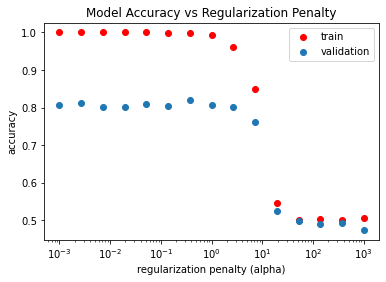

In [80]:
# find best alpha
train_scores = list()
train_aucs = list()
train_losses = list()

val_scores = list()
val_aucs = list()
val_losses = list()

best_alpha = 10**-3
best_loss = 1000

kf = KFold(shuffle=True)
for a in np.logspace(-3, 3, 15):
    model = MLPClassifier(activation='relu', solver='adam', alpha=a)
    
    k_train_scores = list()
    k_train_aucs = list()
    k_train_losses = list()
    
    k_val_scores = list()
    k_val_aucs = list()
    k_val_losses = list()
    
    for train_index, val_index in kf.split(X):
        x_train, x_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        model.fit(x_train, y_train)
        
        train_probas = model.predict_proba(x_train)[:,1]
        val_probas = model.predict_proba(x_val)[:,1]
                
        k_train_scores.append(model.score(x_train, y_train))
        k_train_aucs.append(roc_auc_score(y_train, train_probas))
        k_train_losses.append(log_loss(y_train, train_probas))

        k_val_scores.append(model.score(x_val, y_val))
        k_val_aucs.append(roc_auc_score(y_val, val_probas))
        k_val_losses.append(log_loss(y_val, val_probas))

    if np.mean(k_val_losses) < best_loss:
        best_alpha = a
        best_loss = np.mean(k_val_losses)

    train_scores.append(np.mean(k_train_scores))
    train_aucs.append(np.mean(k_train_aucs))
    train_losses.append(np.mean(k_train_losses))

    val_scores.append(np.mean(k_val_scores))
    val_aucs.append(np.mean(k_val_aucs))
    val_losses.append(np.mean(k_val_losses))

    print('alpha: {:4f}   score: {:5f}   auc: {:5f}   loss: {:5f}'.format(
        a,
        np.mean(k_val_scores), 
        np.mean(k_val_aucs),
        np.mean(k_val_losses)))

print('best alpha:', best_alpha)

# plot accuracy vs alpha
plt.title('Model Accuracy vs Regularization Penalty')
plt.xlabel('regularization penalty (alpha)')
plt.ylabel('accuracy')
plt.scatter(np.logspace(-3, 3, 15), train_scores, c='r', label='train')
plt.scatter(np.logspace(-3, 3, 15), val_scores, label='validation')
plt.xscale('log')
plt.legend()
plt.show()

In [3]:
best_alpha = 1.0

In [8]:
# find best tolerance
train_scores = list()
train_aucs = list()
train_losses = list()

val_scores = list()
val_aucs = list()
val_losses = list()

best_tol = 10**-8
best_loss = 1000

tols = list()
for i in range(-12, 4, 1):
    tols.append(10**i)


kf = KFold(shuffle=True)
for t in tols:
    model = MLPClassifier(activation='relu', solver='adam', alpha=best_alpha, tol=t)
    
    k_train_scores = list()
    k_train_aucs = list()
    k_train_losses = list()
    
    k_val_scores = list()
    k_val_aucs = list()
    k_val_losses = list()
    
    for train_index, val_index in kf.split(X):
        x_train, x_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        model.fit(x_train, y_train)
        
        train_probas = model.predict_proba(x_train)[:,1]
        val_probas = model.predict_proba(x_val)[:,1]
                
        k_train_scores.append(model.score(x_train, y_train))
        k_train_aucs.append(roc_auc_score(y_train, train_probas))
        k_train_losses.append(log_loss(y_train, train_probas))

        k_val_scores.append(model.score(x_val, y_val))
        k_val_aucs.append(roc_auc_score(y_val, val_probas))
        k_val_losses.append(log_loss(y_val, val_probas))

    if np.mean(k_val_losses) < best_loss:
        best_tol = t
        best_loss = np.mean(k_val_losses)

    train_scores.append(np.mean(k_train_scores))
    train_aucs.append(np.mean(k_train_aucs))
    train_losses.append(np.mean(k_train_losses))

    val_scores.append(np.mean(k_val_scores))
    val_aucs.append(np.mean(k_val_aucs))
    val_losses.append(np.mean(k_val_losses))

    print('tol: {}   score: {:5f}   auc: {:5f}   loss: {:5f}'.format(
        t,
        np.mean(k_val_scores), 
        np.mean(k_val_aucs),
        np.mean(k_val_losses)))

print('best tol:', best_tol)

# plot accuracy vs layer size
plt.title('Model Accuracy vs Tolerance')
plt.xlabel('tolerance (1e-tol)')
plt.ylabel('accuracy')
plt.scatter(tols, train_scores, c='r', label='train')
plt.scatter(tols, val_scores, label='validation')
plt.xscale('log')
plt.legend()
plt.show()

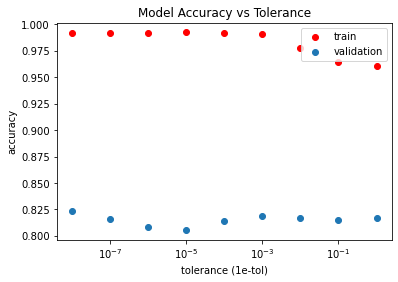

In [7]:

# plot accuracy vs layer size
plt.title('Model Accuracy vs Tolerance')
plt.xlabel('tolerance (1e-tol)')
plt.ylabel('accuracy')
plt.scatter(tols, train_scores, c='r', label='train')
plt.scatter(tols, val_scores, label='validation')
plt.xscale('log')
plt.legend()
plt.show()


In [ ]:
# get details of best model
model = MLPClassifier(activation='relu', solver='adam', alpha=best_alpha, tol=best_tol)
    
k_train_scores = list()
k_train_aucs = list()
k_train_losses = list()

k_val_scores = list()
k_val_aucs = list()
k_val_losses = list()

for train_index, val_index in kf.split(X):
    x_train, x_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    model.fit(x_train, y_train)
    
    train_probas = model.predict_proba(x_train)[:,1]
    val_probas = model.predict_proba(x_val)[:,1]
            
    k_train_scores.append(model.score(x_train, y_train))
    k_train_aucs.append(roc_auc_score(y_train, train_probas))
    k_train_losses.append(log_loss(y_train, train_probas))

    k_val_scores.append(model.score(x_val, y_val))
    k_val_aucs.append(roc_auc_score(y_val, val_probas))
    k_val_losses.append(log_loss(y_val, val_probas))

print('TRAIN -- auc: {:5f}   loss: {:5f}   score: {:5f}'.format(
    np.mean(k_train_aucs),
    np.mean(k_train_losses),
    np.mean(k_train_scores)))

print('VALID -- auc: {:5f}   loss: {:5f}   score: {:5f}'.format(
    np.mean(k_val_aucs),
    np.mean(k_val_losses),
    np.mean(k_val_scores)))

TRAIN -- auc: 0.999533   loss: 0.112838   score: 0.991354
VALID -- auc: 0.885777   loss: 0.439872   score: 0.816250


### Grid search other models 

In [ ]:
parameters = {
    'solver': ['lbfgs', 'adam'],
    'alpha': list(np.logspace(-3, 3, 20)),
    'activation': ['identity', 'relu'],
    'tol': list(range(-8, 1, 1))
}

mlp = GridSearchCV(MLPClassifier(), parameters)
mlp.fit(X, y)

pd.DataFrame(mlp.cv_results_)

## Decision Tree Classifier 